In [7]:
import os.path as osp
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import torch
from torchvision.datasets import CocoDetection

from detectron2.engine.defaults import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, datasets
from detectron2.config import get_cfg

In [2]:
dataset_path = '/workspace/ros/data/20211117152701/'
datasets.register_coco_instances('broccoli_val', {}, dataset_path + 'trainval.json', dataset_path + 'image/')

In [8]:
cfg = get_cfg()
cfg.merge_from_file('./config/mask_rcnn.yaml')
cfg.MODEL.DEVICE = "cpu"
cfg.MODEL.WEIGHTS = './logs/model_0009999.pth'

# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 80

predictor = DefaultPredictor(cfg)
metadata = MetadataCatalog.get('broccoli_val')

In [4]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

In [9]:
def test_one(image, threshold=0.5): 
    r = predictor(image)
    print(r)

    instances = r['instances'].to('cpu').get_fields()
    scores = instances['scores'].numpy()
    remove_indices = scores < threshold
    
    scores = np.delete(scores, remove_indices, 0)
    bboxes = np.delete(instances['pred_boxes'].tensor.numpy(), remove_indices, 0)
    labels = np.delete(instances['pred_classes'].numpy(), remove_indices, 0)

    try:
        masks = np.delete(instances['pred_masks'].numpy(), remove_indices, 0)
    except KeyError:
        masks = None
    try:    
        visualizer = Visualizer(image, metadata=metadata, scale=1.0)
        # labels = np.array(metadata.get('thing_classes'))[labels]
        labels = ['broccoli'] * len(labels)
        viz = visualizer.overlay_instances(labels=labels, boxes=bboxes, masks=masks)
        image = viz.get_image()
    except (AttributeError, NameError):
        pass
    
    plt.axis('off')
    plt.imshow(image)
    plt.show()

{'instances': Instances(num_instances=8, image_height=936, image_width=1448, fields=[pred_boxes: Boxes(tensor([[494.9168, 463.8319, 579.2128, 553.2056],
        [775.3486, 435.1979, 861.3610, 511.2794],
        [370.3274, 390.6329, 453.8119, 467.4328],
        [494.0997, 354.2340, 535.1389, 392.8020],
        [594.6992, 609.1445, 655.8130, 707.2987],
        [637.0413, 638.9980, 683.3253, 688.8134],
        [385.3208, 389.3109, 437.7926, 430.7041],
        [494.9918, 354.2237, 560.3757, 419.5436]])), scores: tensor([0.9999, 0.9998, 0.9997, 0.9993, 0.9950, 0.9749, 0.8839, 0.8182]), pred_classes: tensor([0, 0, 0, 0, 0, 0, 0, 0]), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False,

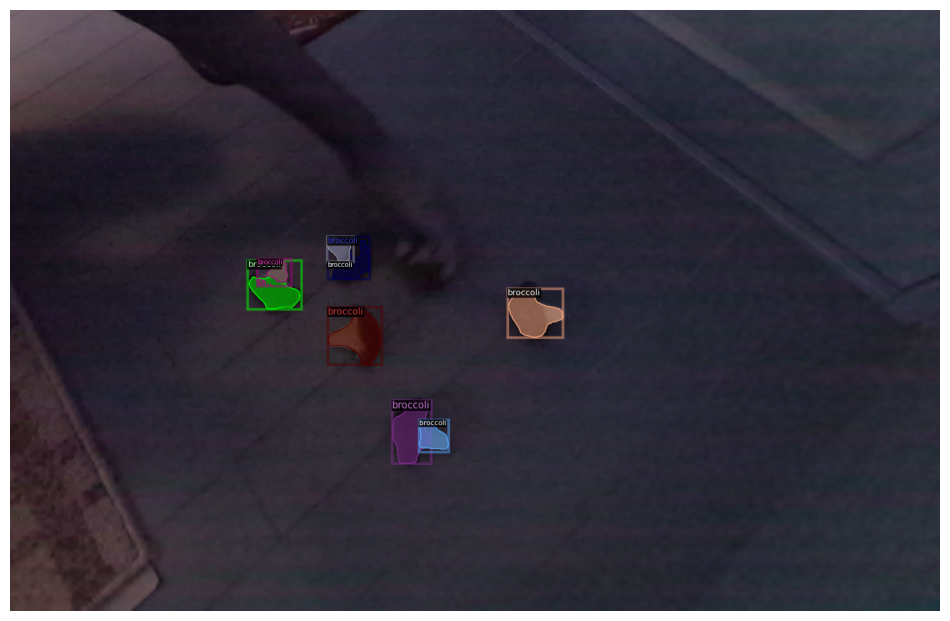

In [17]:
im_path = '/workspace/ros/data/20211117152701/image/0102.jpg'
im = cv.imread(im_path)

im = im[600:, 600:]
test_one(im)